In [167]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

micro = 10**(6)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [ ]:
###########################################
###########################################
#Switching over to resid2.tmp files
#Creating sublplots for L-band (1-2 GHz), S-band (2-4 GHz), and 430 MHz band (0.3-1 GHz)

In [3]:
import residuals as r

#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
from matplotlib import ticker

tick_locator = ticker.MaxNLocator(nbins=9)

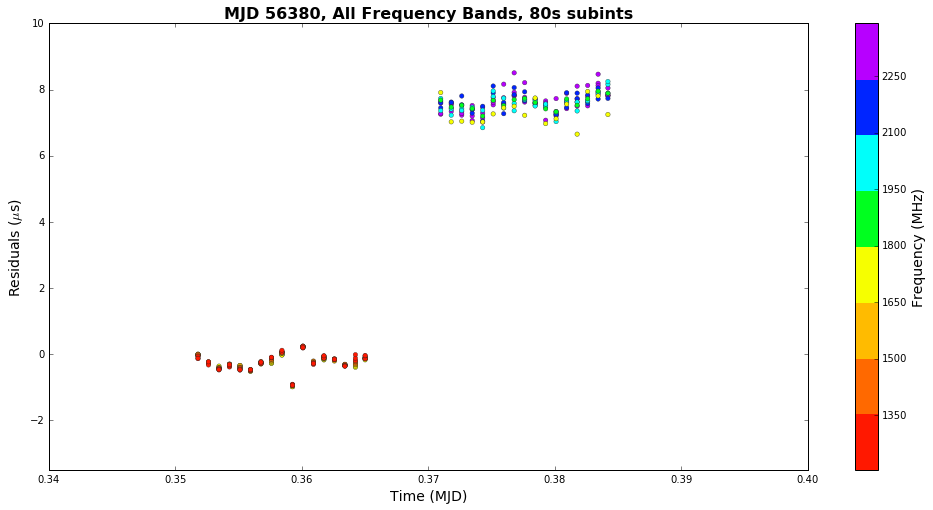

In [225]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

date = 56380

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter((x.bary_TOA - date), micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_xlim(0.34, 0.4)
ax.set_ylim(-3.5, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.set_title('MJD 56380, All Frequency Bands, 80s subints', fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')


plt.show()

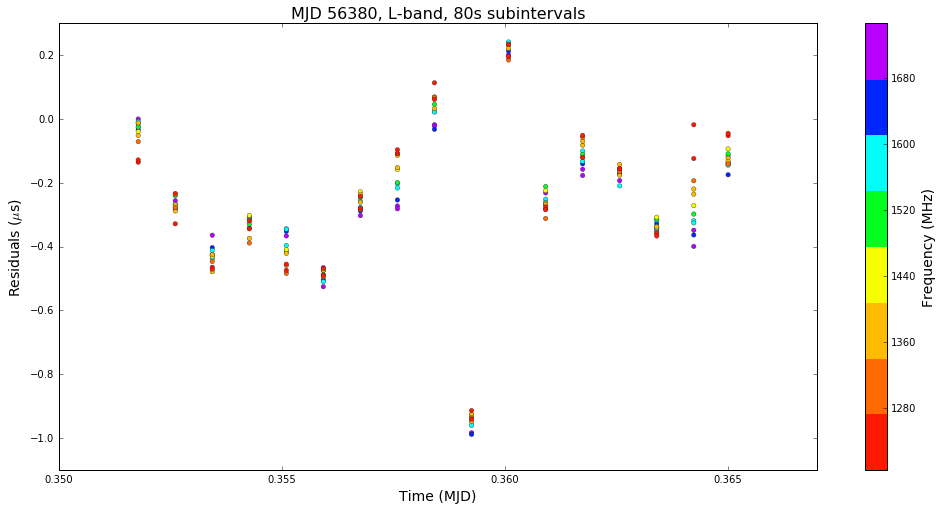

In [213]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.1, 0.3)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

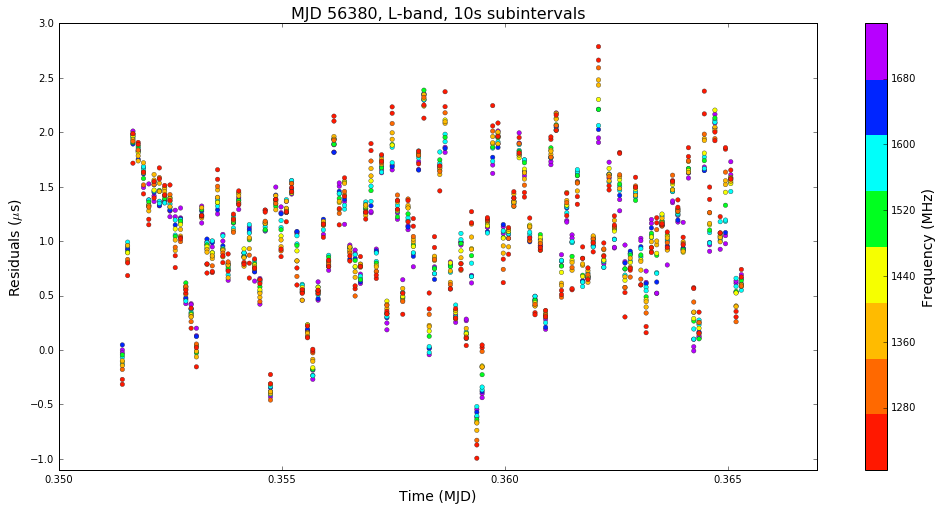

In [214]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_NTF8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)
                   
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-band, 10s subintervals', fontsize='16')
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.1, 3.0)
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [ ]:
print max(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])
print min(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])

In [ ]:
1725-1227

In [18]:
498/10

49

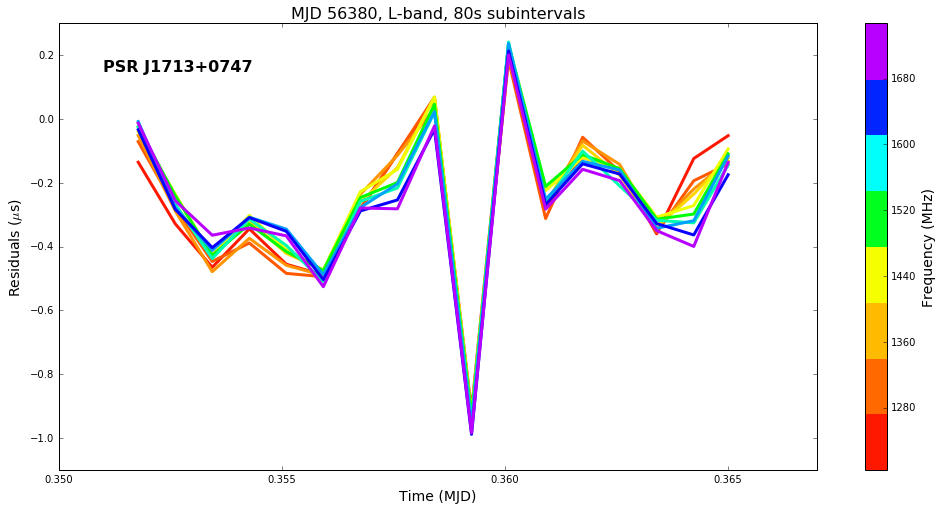

In [215]:
#Create a plot that goes up by increments of 62 and then plots each line as a different color.
#This uses the same section as the Lam plot

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 10)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1278
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.1, 0.3)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+49
    m=m+49
ax.annotate('PSR J1713+0747', xy=(0.351,0.15), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

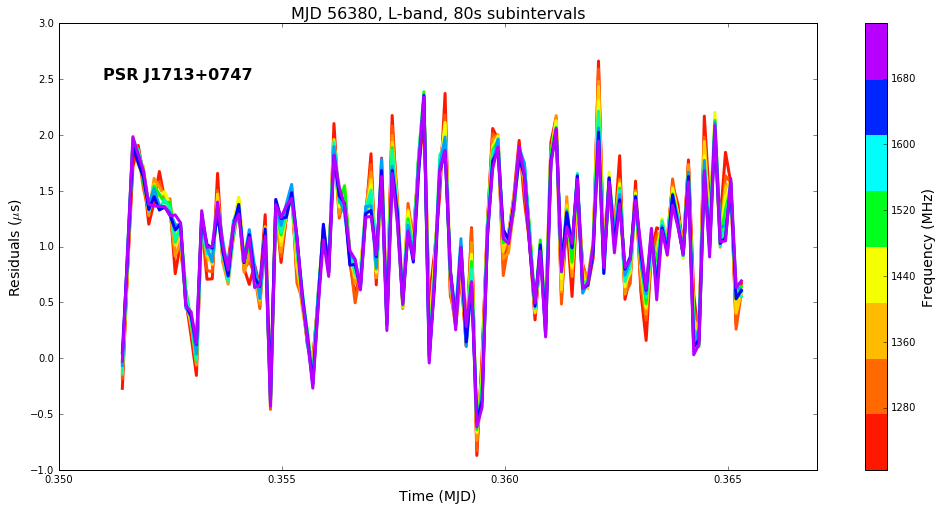

In [216]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_NTF8.tmp")

condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)
date=56380

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1278
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.0, 3.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+49
    m=m+49
ax.annotate('PSR J1713+0747', xy=(0.351,2.5), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

#need to fix the colorbar - right now it's calling the plot above (8-color)

In [ ]:
## =============================
## Running on the highest SNR day for J1713
## =============================

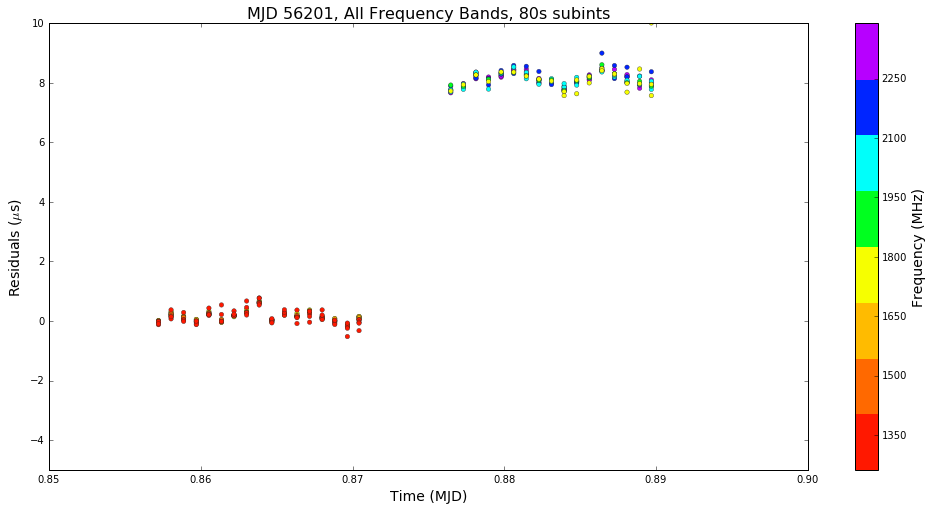

In [217]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56201_80F8.tmp")

date=56201

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.85, 0.9)
ax.set_ylim(-5.0, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

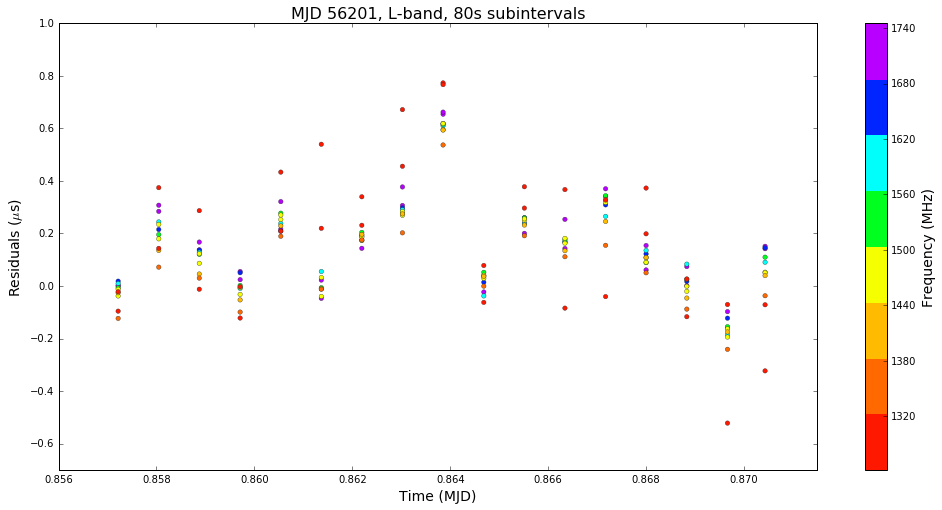

In [218]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56201_80F8.tmp")

condition=(x.bary_TOA > 56201.85) & (x.bary_TOA < 56201.872)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.856, 0.8715)
ax.set_ylim(-0.7, 1.0)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

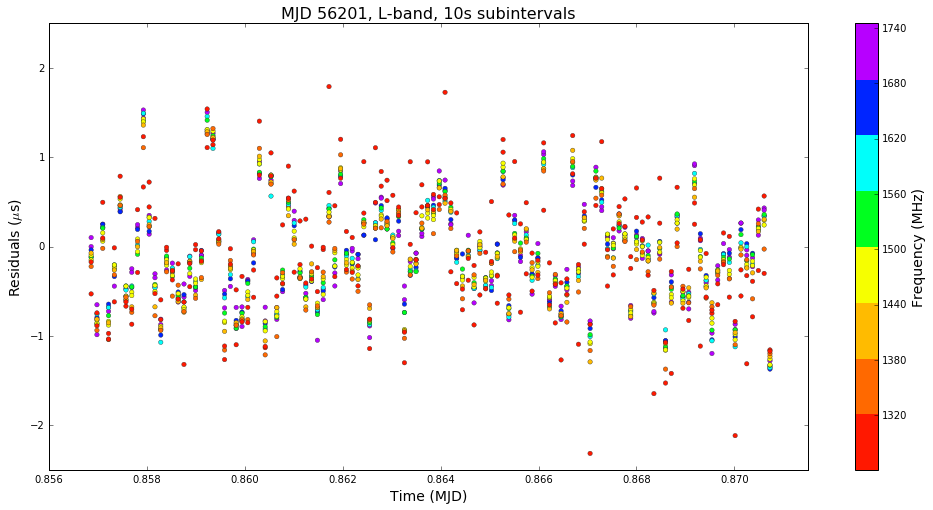

In [219]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56201_NTF8.tmp")

date = 56201
condition=(x.bary_TOA > 56201.85) & (x.bary_TOA < 56201.872)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, L-band, 10s subintervals', fontsize='16')
ax.set_xlim(0.856, 0.8715)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [68]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1744.97983341
1260.95783326


In [94]:
1745-1260
485/9

53

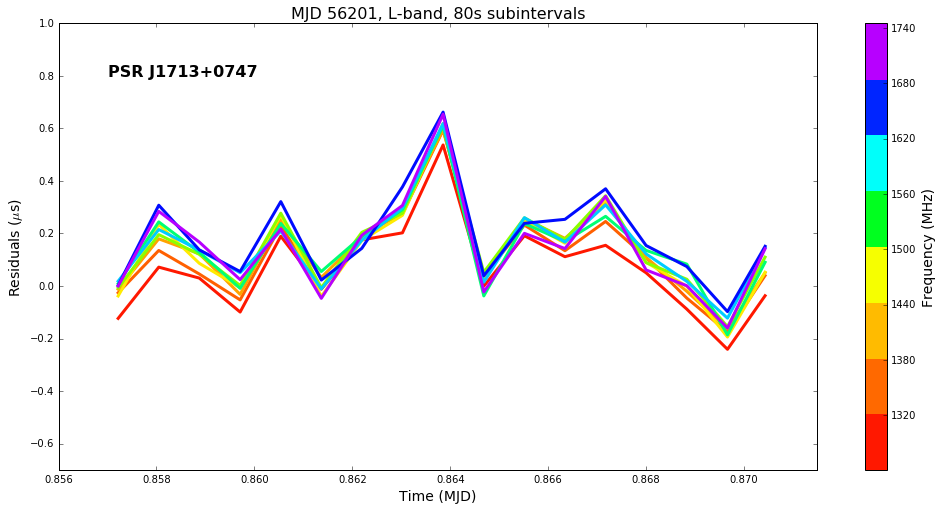

In [220]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56201_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-56201
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1313
m = 1366
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-0.7, 1.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+53
    m=m+53
ax.annotate('PSR J1713+0747', xy=(0.857,0.8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

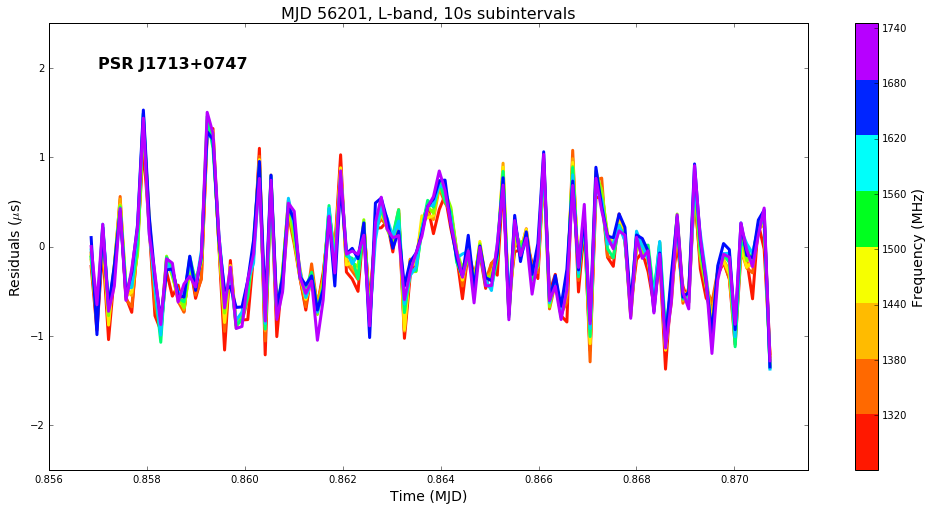

In [221]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56201_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1313
m = 1366
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 10s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+53
    m=m+53
ax.annotate('PSR J1713+0747', xy=(0.857,2.0), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [103]:
## =============================
## Running on the highest SNR (and flux) day for B1937
## =============================

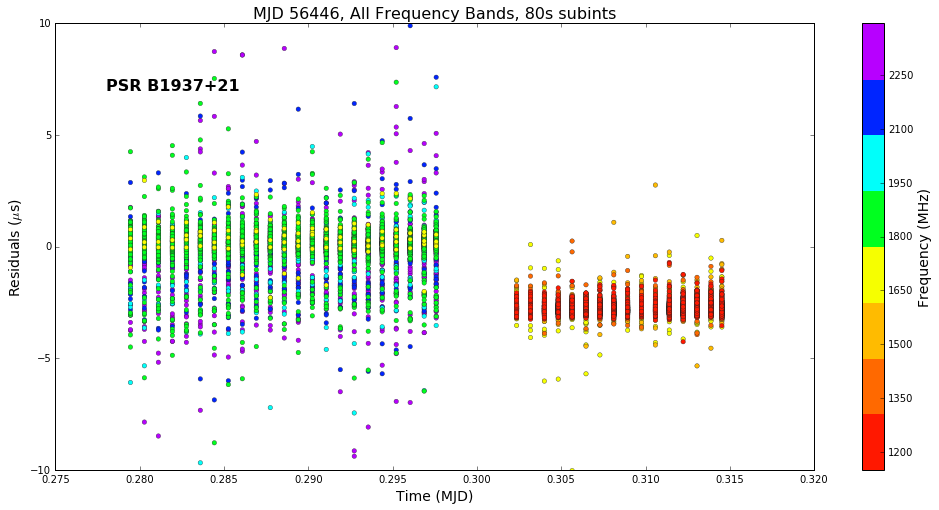

In [222]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56465_80F8.tmp")

date = 56465

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56446, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.275, 0.32)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR B1937+21', xy=(0.278, 7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

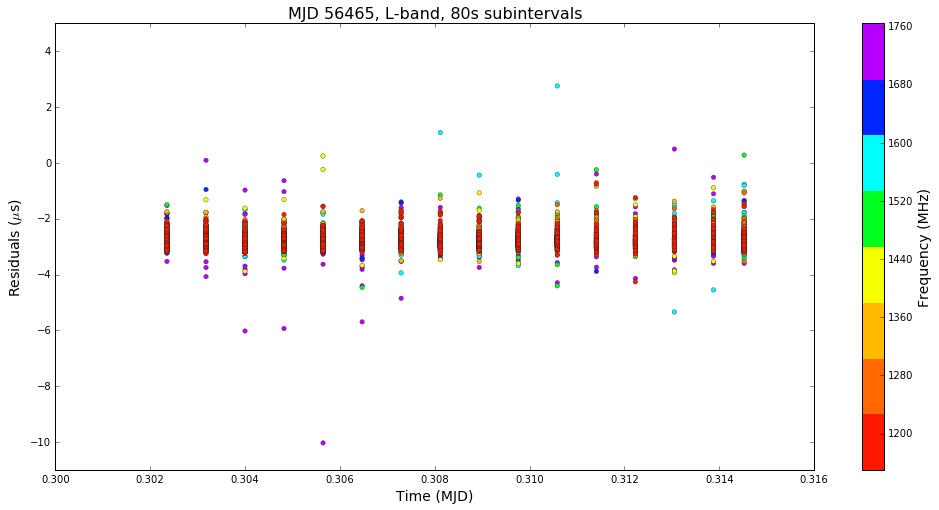

In [223]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56465_80F8.tmp")

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56465, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.3, 0.316)
ax.set_ylim(-11, 5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [145]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1764.30957016
1150.26922471


In [147]:
1764-1150

614

In [158]:
614/512

1

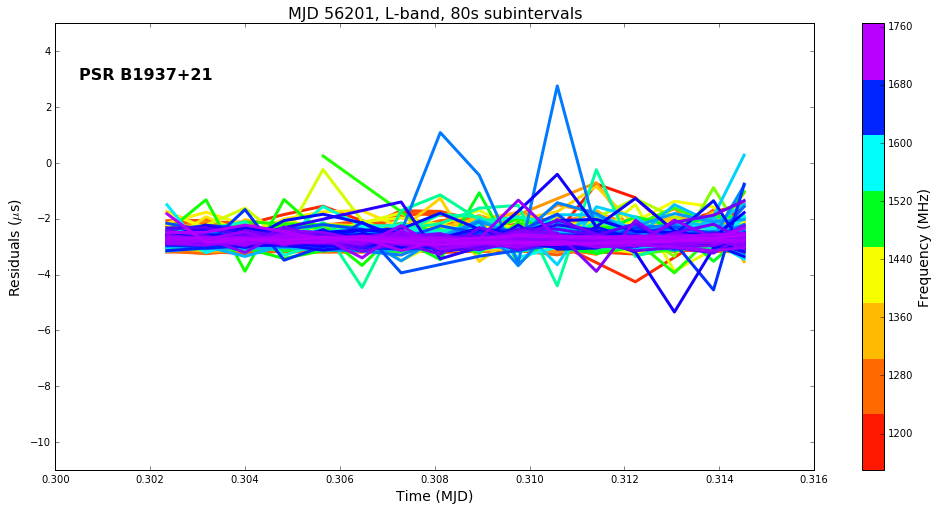

In [224]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56465_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 512)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=512)

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1150
m = 1151
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,512):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.3, 0.316)
    ax.set_ylim(-11, 5.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+1
    m=m+1
ax.annotate('PSR B1937+21', xy=(0.3005,3), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()